<a href="https://colab.research.google.com/github/abbos-trnv/abbos-trnv/blob/main/Analytics_HW2_Turgunov_Abbos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в аналитику данных: домашнее задание 2

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы (можно пользоваться учебниками и генеративными моделями - но пропускайте подсказки ассистентов через голову).

У вас будет 4 задания - каждое весит 2.5 балла из 10, суммарно за домашнее задание можно набрать 10 баллов.

Оцениваются:

* корректность полученных результатов
* подробность обоснования выбора статистических тестов и выводы

Ответы записывайте внутри вашего рабочего google colab, а также (подробно текстом) дублируйте [в форму](https://docs.google.com/forms/d/e/1FAIpQLSfddNy4g88YHPA4fux1TLYaweFf4SWPiU0loeuwCYID7eiW4w/viewform?usp=sf_link).

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [18]:
df_melted = pd.melt(df, id_vars=["year"], var_name="Quarter", value_name="Approval Rating")
df_melted["Quarter"] = df_melted["Quarter"].str.extract(r'Qtr(\d)').astype(int)
df_melted = df_melted.dropna()
df_melted.head()

,year,Quarter,Approval Rating
1,1946,1,63.0
2,1947,1,35.0
3,1948,1,36.0
4,1949,1,69.0
5,1950,1,45.0


In [27]:
x = df_melted[((df_melted["year"] >= 1969) & (df_melted["year"] < 1972)) | ((df_melted["year"] == 1972) & (df_melted["Quarter"] <= 2))]["Approval Rating"].values
y = df_melted[((df_melted["year"] == 1972) & (df_melted["Quarter"] > 2)) | (df_melted["year"] == 1973) | ((df_melted["year"] == 1974) & (df_melted["Quarter"] <= 2))]["Approval Rating"].values


In [28]:
x, y

(array([59., 66., 51., 49., 65., 53., 48., 61., 65., 61., 54., 56., 52.,
        49.]),
 array([68., 28., 44., 25., 40., 27.]))

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [29]:
obs = ...
pval = ...

t_stat, p_val = sts.ttest_ind(x, y, equal_var=True)
obs = t_stat
pval = p_val


In [33]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**
Так как было выполнено:

- условие нормальности и равенство дисперсий
- t-тест работает хорошо с небольшими размерами выборок

Средние значения рейтингов одобрения Никсона до и после Уотергейтского скандала статистически значимо различаются.
Можно заключить, что после Уотергейтского скандала рейтинг Никсона значительно снизился.

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/sleep.csv')
df.head(25)

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

In [54]:
sleep_before = df[df['group'] == 1]['extra']

tobs1, pval1 = sts.ttest_1samp(sleep_before, 0)

tobs1, pval1

(1.3257101407138212, 0.2175977800684489)

нет статистически значимого отличия времени сна студентов до приема снотворного от нормы (8 часов), так как pval1 > 0.05

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

In [55]:
tobs2 = ...
pval2 = ...

sleep_before = df[df['group'] == 1]['extra']
sleep_after = df[df['group'] == 2]['extra']

diff = diff = sleep_after.reset_index(drop=True) - sleep_before.reset_index(drop=True)

tobs2, pval2 = sts.ttest_1samp(diff, 0)


tobs2, pval2

(4.062127683382037, 0.00283289019738427)

In [56]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

1. Выбор пал на одновыборочный тест, так как мы сравниваем среднее значение выборки с уже заданным нам значением, особенно с небольшой выборкой, нормальным распределением и известной дисперсией.

2. А тут был использован парный тест, так как мы сравниваем два связанных набора данных, а также для того, чтобы учитывать корреляцию между двумя наборами данных.

t-статистика для разницы с нормой (tobs1):
1. P-значение для этого теста показало, что нет статистически значимого отклонения от 8 часов. А также tobs1 не такое большое в терминах стандартных отклонений(1.325710)

2. Значение tobs2 = 4.062127 указывает, что среднее время сна после приема снотворного значительно отличается от времени сна до приема снотворного, что подтверждает гипотезу.

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

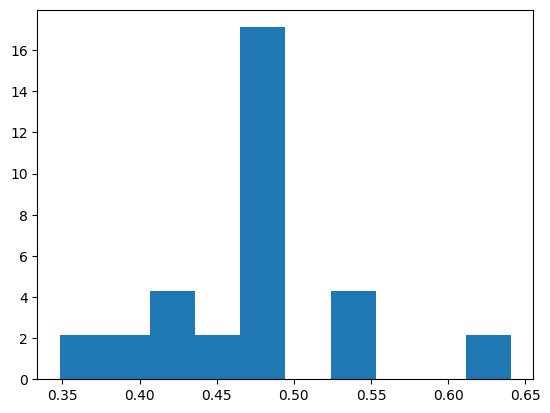

In [57]:
x = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

In [63]:
x


array([0.3484705, 0.6406202, 0.5498178, 0.5374537, 0.4004438, 0.4262919,
       0.4171558, 0.4779768, 0.4506574, 0.4766018, 0.4886766, 0.4847412,
       0.4816139, 0.4894059, 0.4673653, 0.4673297])

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

In [76]:
from statsmodels.stats.descriptivestats import sign_test

pvalue_1 = sign_test(x, 0.5)[1]

pvalue_1

0.021270751953125

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

In [72]:
diff = x - 0.5

tstat, pvalue_2 = sts.wilcoxon(diff)

pvalue_2

0.09344482421875

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

In [73]:
from statsmodels.stats.weightstats import ztest, zconfint

pvalue_3 = ...

diff = x - 0.5

mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)

n = len(diff)

z_stat = mean_diff / (std_diff / np.sqrt(n))

pvalue_3 = 2 * (1 - sts.norm.cdf(np.abs(z_stat)))

pvalue_3

0.13460721078205817

In [77]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ (продублируйте в гугл-форму):__
Ну в первом тесте мы проверяли количество знаков, то есть значений, меньших 0.5 и больших 0.5, что в свою очередь и дает значение больше 0.05, так как значений меньших 0.5 состовляет окло 80%, поэтому тест и выдает, что различие статистически важно

Однако в остальных 2 тестах были учтены не только разница в знаках, но и насколько сами значения отличаются от предпологаемой медианы, поэтому в последних тестах p-значение было больше 0.05

## Задание 4 (транзакции клиентов)

Для увеличения конверсии мы хотим переименовать кнопку "Subscribe now!" на сайте в "Keep me updated".

Данные о результатах A/B-теста находятся в таблице `a_b_test`. В колонке `transaction` для каждого клиента указано, кликнул он по кнопке или нет.

Оцените эффект от изменения названия кнопки.



In [89]:
a_b_test = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/ClientsTransactions.csv")

a_b_test.sample(10)

,group,transaction
2921,A,0
1381,B,0
1092,B,0
1612,B,0
2656,A,0
1082,B,0
1636,A,0
870,A,0
2591,B,0
2900,B,0


Создайте summary_table. Код должен иметь структуру (названия колонок, строк и их количество) как на таблице со скриншота.

In [85]:
group_a = a_b_test[a_b_test['group'] == 'A']
group_b = a_b_test[a_b_test['group'] == 'B']

num_users_a = len(group_a)
num_users_b = len(group_b)

num_transactions_a = group_a['transaction'].sum()
num_transactions_b = group_b['transaction'].sum()

conversion_rate_a = num_transactions_a / num_users_a
conversion_rate_b = num_transactions_b / num_users_b

summary_data = {
    'group': ['A', 'B'],
    'transaction': [num_transactions_a, num_transactions_b],
    'conversion_rate': [conversion_rate_a, conversion_rate_b]
}

summary_table = pd.DataFrame(summary_data)

summary_table

,group,transaction,conversion_rate
0,A,56,0.027184
1,B,74,0.031651


Отфильтруйте исходную таблицу, оставив в ней только клиентов группы А - результат назовите A_group. Создайте аналогичный объект B_group по группе B.

Нарисуйте гистограмму, отображающую на одном рисунке количество успешных транзакций (кликов по кнопке) для каждой группы.

In [97]:
A_group = a_b_test[a_b_test['group'] == 'A']
B_group = a_b_test[a_b_test['group'] == 'B']

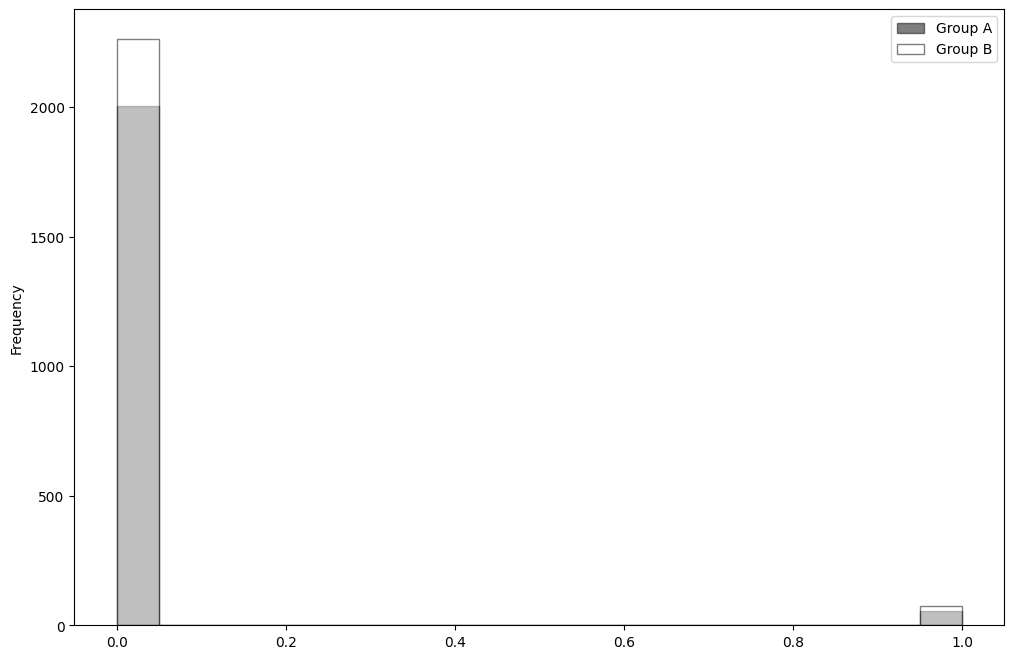

In [114]:
plt.figure(figsize=(12, 8))

plt.hist(A_group['transaction'], bins=20, color='black', alpha=0.5, edgecolor='black', label='Group A')

plt.hist(B_group['transaction'], bins=20, color='white', edgecolor='black', alpha=0.5, label='Group B')

plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Проведите статистический тест для сравнения эффекта от изменения названия кнопки. Сначала сформулируйте гипотезу, затем выберите тест и фиксируйте уровень значимости 0.05. Выберите подходящий тест и объясните его выбор. Проверьте гипотезу и сделайте выводы.

__Выводы (продублируйте в гугл-форму):__


сформулируем гипотезу:

Нулевая: Конверсия не отличается между группами A и B.

Альтернативная: Конверсия отличается.

Подберем тест: для сравнения пропорций между двумя группами можно использовать z-тест для двух пропорций, так как мы сравниваем доли успехов в двух независимых выборках.

уровень значимости 0.05


In [120]:
from statsmodels.stats.proportion import proportions_ztest

count_A = A_group['transaction'].sum()
nobs_A = len(A_group)
count_B = B_group['transaction'].sum()
nobs_B = len(B_group)

count = [count_A, count_B]
nobs = [nobs_A, nobs_B]

stat, pval = proportions_ztest(count, nobs)

stat, pval

(-0.8727073961398345, 0.3828225853152667)

Выбор теста: Для сравнения пропорций между двумя группами мы используем z-тест для двух пропорций. Этот тест подходит, так как мы сравниваем доли успехов (кликов по кнопке) в двух независимых выборках.

значение -0.8727073961398345 близко к нулю, что говорит о незначительном отклонении.

Поскольку p-значение значительно больше уровня значимости 0.05, мы не можем отклонить нулевую гипотезу. Это означает, что у нас нет статистически значимых доказательств того, что конверсии между группами A и B отличаются.

Конверсии между группами A и B не отличаются статистически значимо.

Следовательно, переименование кнопки "Subscribe now!" на "Keep me updated" не оказало значимого влияния на конверсию.